In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw = pd.read_csv('acompanhamento-corporal.csv')

In [5]:
for i in range(len(raw['taxa-gordura'])):
  raw['taxa-gordura'][i] = float(raw['taxa-gordura'][i].replace('%', 'e-2'))

for i in range(len(raw['agua-corporal'])):
  raw['agua-corporal'][i] = float(raw['agua-corporal'][i].replace('%', 'e-2'))

for i in range(len(raw['taxa-proteina'])):
  raw['taxa-proteina'][i] = float(raw['taxa-proteina'][i].replace('%', 'e-2'))

database = raw
database

<ipython-input-5-7b6a90f136d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['taxa-gordura'][i] = float(raw['taxa-gordura'][i].replace('%', 'e-2'))
<ipython-input-5-7b6a90f136d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['agua-corporal'][i] = float(raw['agua-corporal'][i].replace('%', 'e-2'))
<ipython-input-5-7b6a90f136d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw['taxa-proteina'][i] = float(raw['taxa-prote

,data,peso,imc,taxa-gordura,agua-corporal,metabolismo-basal,gordura-visceral,massa-muscular,taxa-proteina,idade-corporal
0,2023-03-15,94.55,30.1,0.311,0.492,1908,12,61.86,0.162,45
1,2023-03-16,94.10,30.0,0.31,0.493,1901,12,61.62,0.162,46
2,2023-03-17,94.45,30.1,0.312,0.491,1906,12,61.70,0.162,46
3,2023-03-18,94.45,30.1,0.312,0.491,1906,12,61.69,0.162,46
4,2023-03-19,94.80,30.2,0.312,0.491,1912,12,61.86,0.162,46
...,...,...,...,...,...,...,...,...,...,...
73,2023-05-27,91.65,29.2,0.301,0.499,1865,12,60.81,0.164,44
74,2023-05-28,91.75,29.2,0.3,0.5,1866,12,60.96,0.165,43
75,2023-05-29,90.95,29.0,0.299,0.5,1854,12,60.50,0.165,44
76,2023-05-30,90.40,28.8,0.296,0.502,1846,12,60.36,0.165,43


In [6]:
for column in database.iloc[:, 1:]:
  database[column] = database[column].rolling(min_periods=7, window=7).mean()

database = database.dropna()
database = database.reset_index(drop = True)

seven_day_avg = database
seven_day_avg

,data,peso,imc,taxa-gordura,agua-corporal,metabolismo-basal,gordura-visceral,massa-muscular,taxa-proteina,idade-corporal
0,2023-03-21,94.471429,30.100000,0.311571,0.491571,1906.714286,12.0,61.725714,0.161857,46.000000
1,2023-03-22,94.435714,30.085714,0.311571,0.491571,1906.142857,12.0,61.701429,0.161857,46.142857
2,2023-03-23,94.435714,30.085714,0.311571,0.491571,1906.142857,12.0,61.701429,0.161857,46.142857
3,2023-03-24,94.385714,30.071429,0.311286,0.491857,1905.428571,12.0,61.688571,0.161857,46.142857
4,2023-03-25,94.392857,30.071429,0.311143,0.492000,1905.571429,12.0,61.705714,0.161857,46.142857
...,...,...,...,...,...,...,...,...,...,...
67,2023-05-27,92.107143,29.357143,0.303000,0.497857,1871.428571,12.0,60.938571,0.163714,44.428571
68,2023-05-28,91.971429,29.314286,0.302429,0.498286,1869.428571,12.0,60.904286,0.164000,44.285714
69,2023-05-29,91.771429,29.257143,0.301571,0.498714,1866.428571,12.0,60.840000,0.164286,44.142857
70,2023-05-30,91.521429,29.171429,0.300429,0.499429,1862.714286,12.0,60.764286,0.164429,43.857143


In [7]:
df = seven_day_avg
df['massa-gordura'] = df['peso'] * df['taxa-gordura']
df['taxa-musculo'] = df['massa-muscular']/df['peso']

In [8]:
df

,data,peso,imc,taxa-gordura,agua-corporal,metabolismo-basal,gordura-visceral,massa-muscular,taxa-proteina,idade-corporal,massa-gordura,taxa-musculo
0,2023-03-21,94.471429,30.100000,0.311571,0.491571,1906.714286,12.0,61.725714,0.161857,46.000000,29.434598,0.653380
1,2023-03-22,94.435714,30.085714,0.311571,0.491571,1906.142857,12.0,61.701429,0.161857,46.142857,29.423470,0.653370
2,2023-03-23,94.435714,30.085714,0.311571,0.491571,1906.142857,12.0,61.701429,0.161857,46.142857,29.423470,0.653370
3,2023-03-24,94.385714,30.071429,0.311286,0.491857,1905.428571,12.0,61.688571,0.161857,46.142857,29.380924,0.653580
4,2023-03-25,94.392857,30.071429,0.311143,0.492000,1905.571429,12.0,61.705714,0.161857,46.142857,29.369663,0.653712
...,...,...,...,...,...,...,...,...,...,...,...,...
67,2023-05-27,92.107143,29.357143,0.303000,0.497857,1871.428571,12.0,60.938571,0.163714,44.428571,27.908464,0.661605
68,2023-05-28,91.971429,29.314286,0.302429,0.498286,1869.428571,12.0,60.904286,0.164000,44.285714,27.814788,0.662209
69,2023-05-29,91.771429,29.257143,0.301571,0.498714,1866.428571,12.0,60.840000,0.164286,44.142857,27.675641,0.662951
70,2023-05-30,91.521429,29.171429,0.300429,0.499429,1862.714286,12.0,60.764286,0.164429,43.857143,27.495652,0.663935


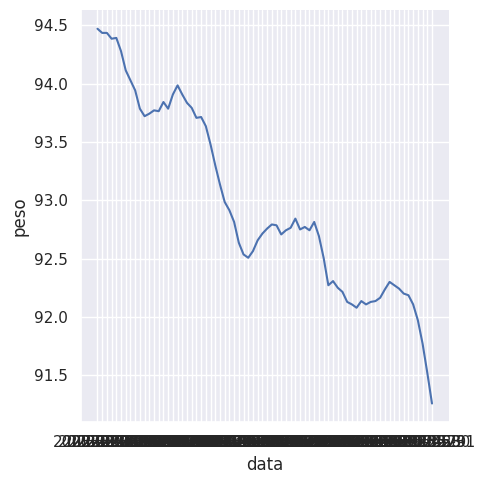

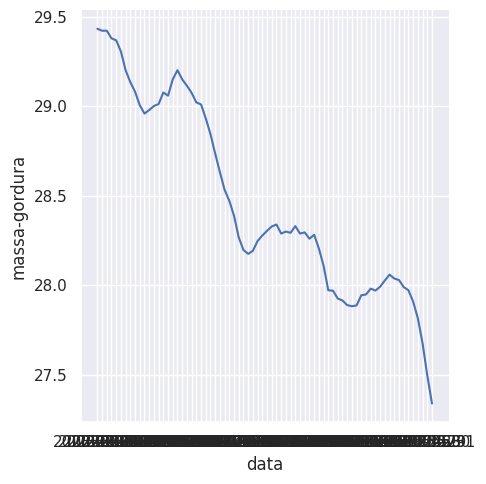

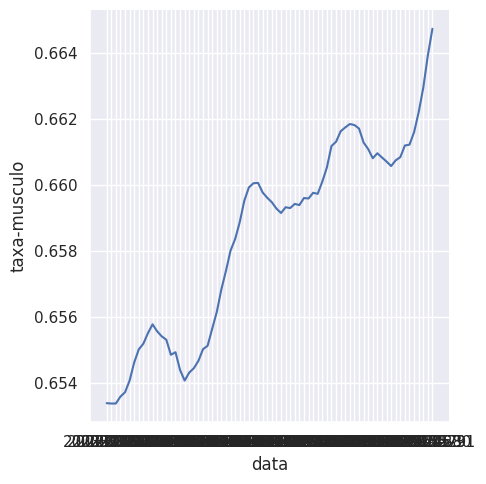

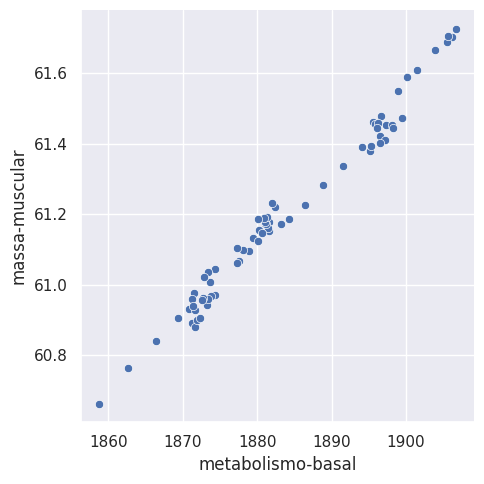

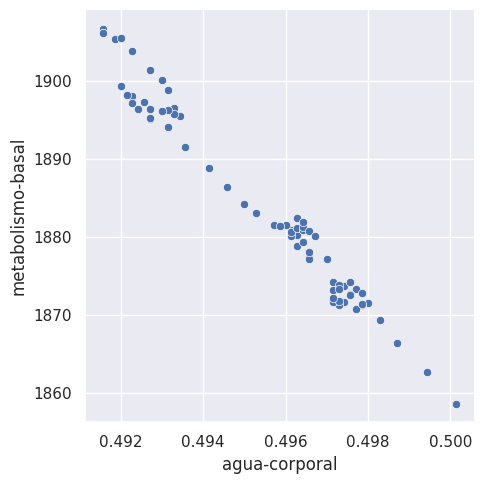

In [20]:
sns.set_theme()

sns.relplot(
    data = df, kind = 'line',
    x='data', y='peso',
)

sns.relplot(
    data = df, kind = 'line',
    x='data', y='massa-gordura',
)

sns.relplot(
    data = df, kind = 'line',
    x='data', y='taxa-musculo',
)

sns.relplot(
    data = df, 
    x='metabolismo-basal', y='massa-muscular',
)